In [0]:
#link to the raw location of the file on which you want to test the models
raw_link_to_github_file = 'https://raw.githubusercontent.com/numenta/NAB/master/data/artificialNoAnomaly/art_daily_no_noise.csv'

In [0]:
debug = True
number_of_features  = 5
train_test_split_ratio = 0.8
window = 3

import warnings
warnings.filterwarnings('ignore')

<bound method NDFrame.head of                 timestamp     value
0     2014-04-01 00:00:00  20.00000
1     2014-04-01 00:05:00  20.00000
2     2014-04-01 00:10:00  20.00000
3     2014-04-01 00:15:00  20.00000
4     2014-04-01 00:20:00  20.00000
...                   ...       ...
4027  2014-04-14 23:35:00  20.00384
4028  2014-04-14 23:40:00  20.00384
4029  2014-04-14 23:45:00  20.00384
4030  2014-04-14 23:50:00  20.00384
4031  2014-04-14 23:55:00  20.00384

[4032 rows x 2 columns]>


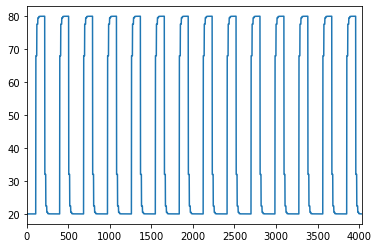

In [34]:
import pandas as pd

df = pd.read_csv(raw_link_to_github_file)
if(debug): 
  print(df.head)

df['value'].plot()
np_arr = df.values

In [35]:
train = np_arr[:int(np_arr.shape[0]*train_test_split_ratio),:]
test = np_arr[int(np_arr.shape[0]*train_test_split_ratio):,:]
print('size',np_arr.shape[0])
print('number of examples in train',train.shape[0])
print('number of examples in test',test.shape[0])

if(debug):
  print(train)
  print(test)
  

size 4032
number of examples in train 3225
number of examples in test 807
[['2014-04-01 00:00:00' 20.0]
 ['2014-04-01 00:05:00' 20.0]
 ['2014-04-01 00:10:00' 20.0]
 ...
 ['2014-04-12 04:30:00' 20.0]
 ['2014-04-12 04:35:00' 20.0]
 ['2014-04-12 04:40:00' 20.0]]
[['2014-04-12 04:45:00' 20.0]
 ['2014-04-12 04:50:00' 20.0]
 ['2014-04-12 04:55:00' 20.0]
 ...
 ['2014-04-14 23:45:00' 20.003839998]
 ['2014-04-14 23:50:00' 20.003839998]
 ['2014-04-14 23:55:00' 20.003839998]]


In [36]:
_#data prep
import numpy as np

train_x = np.array(train[:,1])[np.newaxis, :].T
test_x = np.array(test[:,1])[np.newaxis, :].T
for i in range(number_of_features):
  train_x = np.concatenate((train_x, np.roll(train[:,1],-i)[np.newaxis,:].T), axis=1)
  test_x = np.concatenate((test_x, np.roll(test[:,1],-i)[np.newaxis,:].T), axis=1)

train_x = train_x[:train_x.shape[0]-number_of_features,:number_of_features]
test_x = test_x[:test_x.shape[0]-number_of_features,:number_of_features]

train_y = np.roll(train[:,1],-number_of_features)
train_y = train_y[:train_y.shape[0]-number_of_features]

test_y = np.roll(test[:,1],-number_of_features)
test_y = test_y[:test_y.shape[0]-number_of_features]

if(debug):
  print(train_x.shape)
  print(train_y.shape)
  print(test_x.shape)
  print(test_y.shape)
  

(3220, 5)
(3220,)
(802, 5)
(802,)


In [37]:
train_x = train_x.reshape(train_x.shape[0],1,train_x.shape[1])
test_x = test_x.reshape(test_x.shape[0],1,test_x.shape[1])
if(debug):
  print(train_x.shape)
  print(test_x.shape)




(3220, 1, 5)
(802, 1, 5)


In [38]:
#keras
from keras.models import Sequential
from keras.layers import Dense, Activation
from keras.layers import LSTM
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error

model = Sequential()
model.add(LSTM(50,input_shape=(1,5)))
model.add(Dense(20))
model.add(Dense(1))

model.compile(loss='mean_squared_error', optimizer='adam')
model.fit(train_x, train_y, epochs=10, batch_size=1, verbose=2)


Epoch 1/10
 - 9s - loss: 255.1238
Epoch 2/10
 - 8s - loss: 61.0920
Epoch 3/10
 - 8s - loss: 66.8325
Epoch 4/10
 - 8s - loss: 46.4549
Epoch 5/10
 - 8s - loss: 42.7972
Epoch 6/10
 - 8s - loss: 106.6157
Epoch 7/10
 - 8s - loss: 61.9632
Epoch 8/10
 - 8s - loss: 45.3407
Epoch 9/10
 - 8s - loss: 44.0985
Epoch 10/10
 - 8s - loss: 40.9292


In [0]:
pred_t = model.predict(test_x)

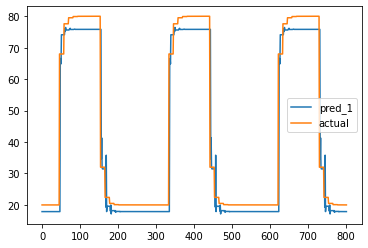

In [40]:
from matplotlib import pyplot as plt

plt.plot(pred_t, label='pred_1')
#plt.plot(prophet_predictions[1], label='pred_3')
plt.plot(test_y,label='actual')
plt.legend()
plt.show()

In [0]:
#TRIED PY-TORCH

In [22]:
# import torch
# import torch.nn as nn

# class LSTMtsf(nn.Module):
#   def __init__(self,input_dim,hidden_dim,output_dim,dropout=False):
#     super(LSTMtsf, self).__init__()
#     self.drpout = dropout
#     self.lstm1 = nn.LSTM(input_dim, hidden_dim,1)
#     if(self.drpout):
#       self.drp1 = nn.Dropout(p=0.3)
#     self.lin1 = nn.Linear(50,20,output_dim)
#     self.lin2 = nn.Linear(20,output_dim)
  
#   def forward(self,x):
#     x = self.lstm1(x)
#     if(self.drpout):
#       x = self.drp1(x[0])
#     x = self.lin1(x)
#     x = self.lin2(x)
#     return x

# model = LSTMtsf(5,50,1,True)
# print(model)



LSTMtsf(
  (lstm1): LSTM(5, 50)
  (drp1): Dropout(p=0.3, inplace=False)
  (lin1): Linear(in_features=50, out_features=20, bias=True)
  (lin2): Linear(in_features=20, out_features=1, bias=True)
)


In [23]:
# train_x_torch = torch.from_numpy(train_x.astype(float))
# test_x_torch = torch.from_numpy(test_x.astype(float))
# train_y_torch = torch.from_numpy(train_y.reshape(train_y.shape[0],1).astype(float))
# test_y_torch = torch.from_numpy(test_y.reshape(test_y.shape[0],1).astype(float))

# if(debug):
#   print(train_x_torch.size())

torch.Size([3220, 1, 5])


In [24]:
# #training

# optimizer = torch.optim.SGD(model.parameters(), lr=0.2)
# loss_fn = nn.MSELoss()
# model.double()
# epochs = 10
# for t in range(epochs):
#     y_pred = model(train_x_torch)
#     loss = loss_fn(y_pred, train_y_torch)
#     print(t, loss.item())
#     optimizer.zero_grad()
#     loss.backward()
#     optimizer.step()
  



0 2555.24220794487
1 4318.947820529031
2 72067074095.68039
3 6.248394523613242e+31
4 4.6510413830144235e+94
5 1.7001071893894617e+284
6 nan
7 nan
8 nan
9 nan


In [0]:
# y_pred = model(test_x_torch)
# loss = loss_fn(y_pred, test_y_torch)
# loss

In [0]:
# y_pred.detach().numpy().flatten()